In [1]:
import tweepy
from textblob import TextBlob #NLP bahasa inggris
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
%matplotlib inline

In [2]:
data = pd.read_csv('Dataset/Label Otomatis/Train.csv',sep=",")#nama file data
data = data.astype({'Tweet' : 'string'})
data.dtypes

Tweet    string
dtype: object

In [4]:
def load_data():
    data = pd.read_csv('Dataset/Label Otomatis/Train.csv',sep=";")#nama file data
    return data

In [5]:
tweet_df = load_data()
tweet_df.head()

,Tweet
0,harga paket bansos covid 19 kemensos ternyata ...
1,harga paket bansos covid 19 kemensos ternyata ...


In [6]:
df  = pd.DataFrame(tweet_df[['Tweet']])
df

,Tweet
0,harga paket bansos covid 19 kemensos ternyata ...
1,harga paket bansos covid 19 kemensos ternyata ...


In [8]:
for index, row in df.iterrows():
  id_blob = df.iloc[index]['Tweet']
  translation = TextBlob(id_blob)
  if translation.detect_language() != 'en' :
    en_blob = translation.translate(to=u'en')
  else :
    en_blob = translation
  df.at[index,str('Terjemah')] = str(en_blob)
# Lets take a look
df.head()

,Tweet,Tweets_Translated,Terjemah
0,harga paket bansos covid 19 kemensos ternyata ...,the price of the social assistance package for...,the price of the social assistance package for...
1,harga paket bansos covid 19 kemensos ternyata ...,the price of the social assistance package for...,the price of the social assistance package for...


In [9]:
def getSubjectivity(text): 
    return TextBlob(str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(str(text)).sentiment.polarity

df['Subjectivity'] = df['Terjemah'].apply(getSubjectivity)
df['Polarity'] = df['Terjemah'].apply(getPolarity)

df

,Tweet,Tweets_Translated,Terjemah,Subjectivity,Polarity
0,harga paket bansos covid 19 kemensos ternyata ...,the price of the social assistance package for...,the price of the social assistance package for...,0.333333,0.016667
1,harga paket bansos covid 19 kemensos ternyata ...,the price of the social assistance package for...,the price of the social assistance package for...,0.333333,0.016667


In [10]:
def getSentiment(score):
    if score < 0 :
        return 'negatif'
    elif score == 0 :
        return 'netral'
    else :
        return 'positif'
# Apply the function
df['Sentiment'] = df['Polarity'].apply(getSentiment)
#lets take a look
df

,Tweet,Tweets_Translated,Terjemah,Subjectivity,Polarity,Sentiment
0,harga paket bansos covid 19 kemensos ternyata ...,the price of the social assistance package for...,the price of the social assistance package for...,0.333333,0.016667,positif
1,harga paket bansos covid 19 kemensos ternyata ...,the price of the social assistance package for...,the price of the social assistance package for...,0.333333,0.016667,positif


In [11]:
def getSentiments(kata):
    if kata == 'negatif' :
        return '1'
    elif kata == 'netral' :
        return '0'
    else :
        return '2'
# Apply the function
df['Sentiments'] = df['Sentiment'].apply(getSentiments)
#lets take a look
df

,Tweet,Tweets_Translated,Terjemah,Subjectivity,Polarity,Sentiment,Sentiments
0,harga paket bansos covid 19 kemensos ternyata ...,the price of the social assistance package for...,the price of the social assistance package for...,0.333333,0.016667,positif,2
1,harga paket bansos covid 19 kemensos ternyata ...,the price of the social assistance package for...,the price of the social assistance package for...,0.333333,0.016667,positif,2


In [12]:
df.to_csv('Dataset/Label Otomatis/Train terjemah.csv',encoding='utf8', index=False)
df.head()

,Tweet,Tweets_Translated,Terjemah,Subjectivity,Polarity,Sentiment,Sentiments
0,harga paket bansos covid 19 kemensos ternyata ...,the price of the social assistance package for...,the price of the social assistance package for...,0.333333,0.016667,positif,2
1,harga paket bansos covid 19 kemensos ternyata ...,the price of the social assistance package for...,the price of the social assistance package for...,0.333333,0.016667,positif,2


In [10]:
# Menghitung perbandingan tweet dan retweet
r_stat = df['Sentiments'].groupby(df['Sentiments']).count()
temp = r_stat.values

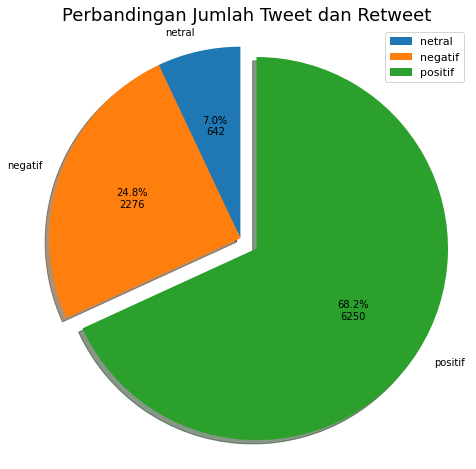

In [11]:
# Plotting Pie
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)

plt.figure(figsize = (8,8))
plt.pie(temp,explode=(0,0,0.1),labels=['netral','negatif','positif'],shadow=True,
        autopct=lambda pct: func(pct, temp),startangle=90)
plt.title('Perbandingan Jumlah Tweet dan Retweet',fontsize=18)
plt.axis('equal')
plt.legend(fontsize=11)
plt.show()